##  Simple classifer model for roman numeral classification

### Author/ML Engineer: Leon Hamnett - [linkedIn](https://www.linkedin.com/in/leon-hamnett/)


### Introduction:

As part of a team of machine learning engineers, I took part in a [datadriven contest](https://https-deeplearning-ai.github.io/data-centric-comp/) organised by Andrew Ng (a well known machine learning teacher and researcher). The aim of this competition was to focus on methods to improve dataset quality as opposed to improving the machine learning model itself. 

During this contest we created a number of different image datasets using such methods as cleaning and relabelling the existing dataset, creating synthetic data and applying a number of different image transforms and augmentations on the images. 

This notebook was used to locally test the impact of our image dataset modifications so we could see the impact they would have on model performance before submitting the images to the competition. 



In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import json
import sys
import os
from os import getcwd

In [ ]:
#mount google drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.getcwd())
os.chdir('/content/drive/MyDrive/Datadriven_contest/Training')
print(os.getcwd())

/content
/content/drive/MyDrive/Datadriven_contest/Training


###Locate folders with images, shuffle into train/validation sets:

In [ ]:
#If necessary, enter the location of the zipped file to unzip to make a new directory unzip <zipped file path> -d <file path to place unzipped files>
#!unzip "/content/drive/MyDrive/Datadriven_contest/Image_datasets/image_gen_base.zip" -d "/content/drive/MyDrive/Datadriven_contest/Image_datasets/images_generated_and_baseline"

In [ ]:
images = '/content/drive/MyDrive/Datadriven_contest/Image_datasets'
os.listdir(images)

['baseline.zip',
 'image_gen.zip',
 'current_train',
 'combined',
 'baseline',
 'image_gen',
 'image_gen_base.zip',
 '.ipynb_checkpoints',
 'image_generated_and_baseline',
 'baseline_and_aug_zoom_flip',
 'augmented_zoom_flip',
 'augmented_blur',
 'augmented_thresh',
 'image_gen2_with_curls.zip',
 'image_gen2_curls_aug_transl',
 'baseline_imagegen2_aug_zoom_flip_thresh_blur',
 'shuffled_temp',
 'baseline_imagegen2_aug_zoom_flip_thresh_blur.zip',
 'Copia de Create shuffle train val split for train (>10,000 images).ipynb',
 'Create_shuffle train val split for train.ipynb']

### Construct the model:

In [ ]:
#change image_dir below to correctly refer to folder with train_valid images
image_dir = "/content/drive/MyDrive/Datadriven_contest/Image_datasets/baseline_and_aug_zoom_flip"
train_dir = os.path.join(image_dir,'train')
val_dir = os.path.join(image_dir,'valid')
test_dir = os.path.join("/content/drive/MyDrive/Datadriven_contest/Image_datasets/baseline/baseline/test/label_book")

In [ ]:
#construct tensorflow data objects of input arrays and labels for each image by flowing the images from the directory
batch_size = 32
train = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32)
    )

valid = tf.keras.preprocessing.image_dataset_from_directory(
        val_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=True,
        seed=123,
        batch_size=batch_size,
        image_size=(32, 32),
    )


test = tf.keras.preprocessing.image_dataset_from_directory(
        test_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
        shuffle=False,
        image_size=(32, 32))
    


Found 6336 files belonging to 10 classes.
Found 773 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


In [ ]:
#load the same model architecture that the competition is using
#use existing pretrained model
base_model = tf.keras.applications.ResNet50( 
        input_shape=(32, 32, 3),
        include_top=False,
        weights=None,
    )

#choose which pretrained layer to use as input to our model
base_model = tf.keras.Model(
        base_model.inputs, outputs=[base_model.get_layer("conv2_block3_out").output]
    )

#construct new layers on top of pretrained model
inputs = tf.keras.Input(shape=(32, 32, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(10)(x)
model = tf.keras.Model(inputs, x)

    

In [ ]:
#set callbacks to stop training early/save best model weights
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4) #model will stop training if validation accuracy decreases [patience] number of times 

#save best model weights
mchp_callback = tf.keras.callbacks.ModelCheckpoint(
        "best_model",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=True,
        save_freq='epoch') #how often to save model weights

callback = [es_callback,mchp_callback]


In [ ]:
#build the model
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"]
    )

### Train the model:

In [ ]:
#train the model, and assign training logs to variable for analysis after the training
history = model.fit(train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=2,
                    validation_data=valid,
                    callbacks=callback)

Epoch 1/20
198/198 - 1192s - loss: 1.9341 - accuracy: 0.3846 - val_loss: 1.5261 - val_accuracy: 0.5252
Epoch 2/20
198/198 - 11s - loss: 1.0611 - accuracy: 0.6799 - val_loss: 1.5127 - val_accuracy: 0.4580
Epoch 3/20
198/198 - 11s - loss: 0.6933 - accuracy: 0.8030 - val_loss: 0.7012 - val_accuracy: 0.7878
Epoch 4/20
198/198 - 11s - loss: 0.5100 - accuracy: 0.8586 - val_loss: 0.4990 - val_accuracy: 0.8551
Epoch 5/20
198/198 - 11s - loss: 0.3961 - accuracy: 0.8873 - val_loss: 0.4476 - val_accuracy: 0.8655
Epoch 6/20
198/198 - 11s - loss: 0.3103 - accuracy: 0.9181 - val_loss: 0.3366 - val_accuracy: 0.8939
Epoch 7/20
198/198 - 11s - loss: 0.2631 - accuracy: 0.9283 - val_loss: 0.3599 - val_accuracy: 0.8862
Epoch 8/20
198/198 - 12s - loss: 0.2188 - accuracy: 0.9405 - val_loss: 0.3996 - val_accuracy: 0.8693
Epoch 9/20
198/198 - 11s - loss: 0.1777 - accuracy: 0.9588 - val_loss: 0.2595 - val_accuracy: 0.9198
Epoch 10/20
198/198 - 12s - loss: 0.1533 - accuracy: 0.9623 - val_loss: 0.2682 - val_accu

### Evaluation model performance:

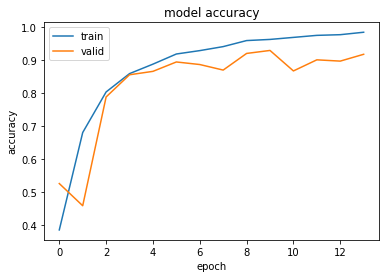

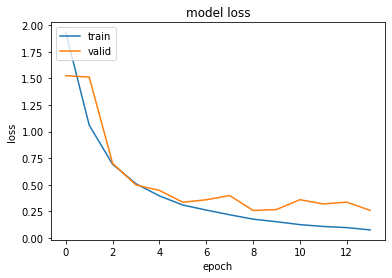

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#compare model predictions against actual labels
predictions = np.array([])
labels =  np.array([])
for x, y in valid: #loop through images, use input x array to make a label prediction and take the y value as the actual label
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

#show a confusion matrix to give a quick overview of performance
tf.math.confusion_matrix(labels=labels, predictions=predictions).numpy()


array([[165,   2,   0,   0,   0,   0,   0,   0,   0,   1],
       [  1, 124,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   9,  51,   1,   0,   0,   1,   0,   0,   0],
       [  0,   4,   1,  53,   2,   0,   0,   0,   2,   1],
       [  2,   1,   0,   0,  71,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,  43,   1,   0,   0,   0],
       [  0,   0,   1,   0,   0,   7,  37,   0,   0,   0],
       [  0,   0,   2,   0,   0,   0,   8,  37,   0,   0],
       [  0,   2,   2,   3,   0,   1,   0,   0,  43,   2],
       [  1,   1,   0,   0,   2,   0,   0,   0,   0,  85]], dtype=int32)

In [ ]:
#load the best weights and evaluate model performance on validation and test sets
model.load_weights("best_model")

loss, acc = model.evaluate(valid)
print(f"final valid loss {loss}, final valid acc {acc}")

test_loss, test_acc = model.evaluate(test)
print(f"test loss {test_loss}, test acc {test_acc}")

25/25 [==============================] - 1s 33ms/step - loss: 0.2682 - accuracy: 0.9288
final valid loss 0.2682117521762848, final valid acc 0.9288486242294312
2/2 [==============================] - 0s 31ms/step - loss: 1.1634 - accuracy: 0.6731
test loss 1.1633946895599365, test acc 0.6730769276618958
0.2682117521762848 0.9288486242294312 1.1633946895599365 0.6730769276618958
